In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as func
import torch.autograd as atgd
import torch.optim as optim
import torchvision

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
batchsize = 16

transform = transforms.Compose(
    [
    transforms.Resize((32,32)),    
    transforms.ToTensor(),
    ])

train_dataset = torchvision.datasets.MNIST(root = './data/mnist', 
                           train = True, 
                           transform = transform,
                           download = True) 
test_dataset = torchvision.datasets.MNIST(root = './data/mnist',
                           train = False,
                           transform = transform,
                           download = True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batchsize,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batchsize,
                                          shuffle=True, num_workers=2)

print("The number of training images: ", len(train_loader)*batchsize)
print("The number of testing images: ", len(test_loader)*batchsize)


print("Data load OK!")

The number of training images:  60000
The number of testing images:  10000
Data load OK!


In [3]:
# # linear classifier
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(32*32, 10)
#     def forward(self, x):
#         x = x.view(-1, 32 * 32)
#         x= self.fc1(x)  
#         return x
# net = Net()


# # Network with only fc layers 
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(32*32, 16*16)
#         self.fc2 = nn.Linear(16*16, 8*8)
#         self.fc3 = nn.Linear(8*8, 10)

#     def forward(self, x):
#         x = x.view(-1, 32 * 32)
#         x = func.relu(self.fc1(x))
#         x = func.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x
    
# net = Net()

# Network with 2 Conv2, 3fc
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 3)
#         self.conv3 = nn.Conv2d(16, 24, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 6*6, 10)
#         self.fc2 = nn.Linear(100, 64)
#         self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
#         print("1",x.size())
        x = self.pool(func.relu(self.conv1(x)))
#         print("2",x.size())
        x = self.pool(func.relu(self.conv2(x)))
#         x = self.pool(func.relu(self.conv3(x)))
#         print("3",x.size())
        x = x.view(-1, 16 * 6 * 6)
#         x = func.relu(self.fc1(x))
        x = self.fc1(x)
#         x = func.relu(self.fc2(x))
#         x = self.fc3(x)
        return x

net = Net()

print("Network Structure: ")
print(net)


# # Network with 2 Conv2, 3fc
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
# #         print("1",x.size())
#         x = self.pool(func.relu(self.conv1(x)))
# #         print("2",x.size())
#         x = self.pool(func.relu(self.conv2(x)))
# #         print("3",x.size())
#         x = x.view(-1, 16 * 5 * 5)
#         x = func.relu(self.fc1(x))
#         x = func.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# net = Net()
# print(net)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Network Structure: 
Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=576, out_features=10, bias=True)
)


In [4]:

for epoch in range(5): 
#     running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()     
        outputs = net(inputs)
        train_loss = criterion(outputs, labels)
        train_loss.backward()
        optimizer.step()
        
#         running_loss += train_loss.item()
#         if i % 1000 == 999:    
            
#     print("epoch number:%d, train_loss: %.3f" % (epoch + 1, running_loss / (len(train_loader)*batchsize) ))
    # training accuracy and loss
    
    print("epoch number %d" % (epoch + 1))
    
    correct = 0
    total = 0
    running_loss = 0
    for data in train_loader:
        images, labels = data
        outputs = net(images)
        
        train_loss = criterion(outputs, labels)
        running_loss += train_loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += batchsize
        correct += (predicted == labels).sum().item()
       
    print('train_accuracy: %.3f %%' % (100 * correct / total))
    print("train_loss: %.3f" % (running_loss / (len(train_loader)*batchsize) ))
    
    # testing accuracy and loss
    correct = 0
    total = 0
    running_loss = 0
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        
        test_loss = criterion(outputs, labels)
        running_loss += test_loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += batchsize
        correct += (predicted == labels).sum().item()
       
    print('test_accuracy: %.3f %%' % (100 * correct / total))
    print("test_loss: %.3f" % (running_loss / (len(test_loader)*batchsize) ))

print("Training OK!")


epoch number 1
train_accuracy: 95.095 %
train_loss: 0.010
test_accuracy: 95.710 %
test_loss: 0.009
epoch number 2
train_accuracy: 97.080 %
train_loss: 0.006
test_accuracy: 97.330 %
test_loss: 0.006
epoch number 3
train_accuracy: 97.743 %
train_loss: 0.005
test_accuracy: 97.780 %
test_loss: 0.004
epoch number 4
train_accuracy: 97.790 %
train_loss: 0.005
test_accuracy: 98.030 %
test_loss: 0.004
epoch number 5
train_accuracy: 98.212 %
train_loss: 0.004
test_accuracy: 98.150 %
test_loss: 0.003
Training OK!


In [160]:
# the loss for different numbers 
single_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                          shuffle=True, num_workers=2)
correct = 0
total = 0
running_loss = [0]*10
number_cnt = [0]*10
for data in single_loader:
    images, labels = data
    outputs = net(images)
    test_loss = criterion(outputs, labels)
    running_loss[labels] += test_loss.item()
    number_cnt[labels] += 1
    
for i in range(10):
    print("test_loss: %.3f" % (running_loss[i] / number_cnt[i]))

test_loss: 0.036
test_loss: 0.038
test_loss: 0.047
test_loss: 0.053
test_loss: 0.060
test_loss: 0.031
test_loss: 0.053
test_loss: 0.057
test_loss: 0.073
test_loss: 0.105


ground truth:  9 predicted result:  1


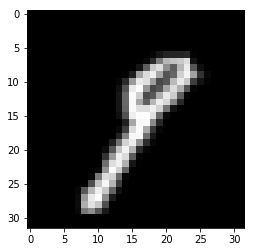

In [187]:
# find incorrect detection result

single_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                          shuffle=True, num_workers=2)
# correct = 0
# total = 0
for data in single_loader:
    images, labels = data
    outputs = net(images)
#     print(images.size())
    _, predicted = torch.max(outputs, 1)
#     total += batchsize
    
    if predicted != labels:
        plt.imshow(images.squeeze(), cmap = "gray")
        print("ground truth: ", labels.item(), "predicted result: ", predicted.item())
        break
        
#     correct += (predicted == labels).sum().item()
    
